- [From Conway to Lenia - Notebook](https://colab.research.google.com/github/OpenLenia/Lenia-Tutorial/blob/main/Tutorial_From_Conway_to_Lenia.ipynb#scrollTo=VAt144SoGZZr)

- [NCA Impl - Notebook](https://github.com/Mayukhdeb/differentiable-morphogenesis/blob/main/notebooks/basic_walkthrough.ipynb)

- [ALIFE2023: Flow-Lenia](https://www.youtube.com/watch?v=605DcOMwFLM)

- [Play animation widget](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#play-animation-widget)

- [GliphNet Model](https://github.com/noahtren/GlyphNet/blob/master/glyphnet/models.py)

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from aesthetic_tensor import aesthetify
from tqdm.auto import tqdm
import nca.vis as vis

/Users/izmac/Library/Caches/pypoetry/virtualenvs/nca-Dr2PtgJ1-py3.9/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
aesthetify()

In [5]:
from nca.models import FCInvAE

In [6]:
model = FCInvAE(msg_size=64, frame_size=128)

In [7]:
out = model(2, 0)
# {k: v.shape for k, v in out.items()}
# model.render_out(out)

In [8]:
example_msg = model.sample_msg(7)

In [9]:
hist = []

In [10]:
%config InlineBackend.figure_formats = ['svg']

In [11]:
out = model.forward_msg(example_msg, noise_size=0)
# out["image"]

In [12]:
@vis.display_generator_decorator(sleep=2)
def display_hist():
    while True:
        out = model.forward_msg(example_msg, noise_size=0)
        img = out["image"].ae.N.zoom(1)[0].cmap().img
        yield img

[7](~<aesthetic_tensor.tensor.ImageWrapper object at 0x15fa95df0>)

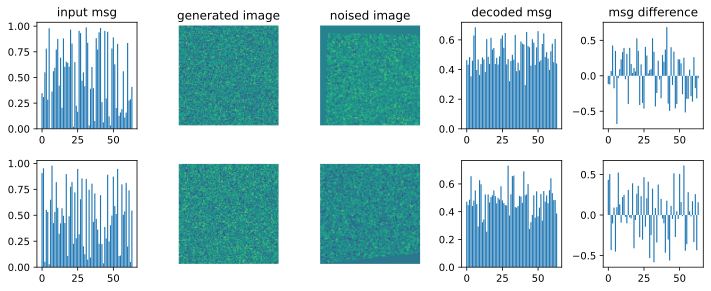

In [13]:
out = model.forward(2, noise_size=1)
model.render_out(out, size=2)

In [114]:
# @vis.display_generator_decorator(sleep=2)
# def display_hist():
#     while True:
#         fig, ax = plt.subplots(figsize=(5, 3))
#         ax.plot(hist)
#         plt.yscale('log')
#         plt.close()
#         yield fig

In [ ]:
outs = []
for i in tqdm(range(4000)):
    loss, out = model.optim_step(32, noise_size=1, lr=0.001)
    hist.append(loss)
    if i % 10 == 0:
        out = model.forward_msg(example_msg, noise_size=1)
        outs.append(out)

  0%|          | 0/4000 [00:00<?, ?it/s]

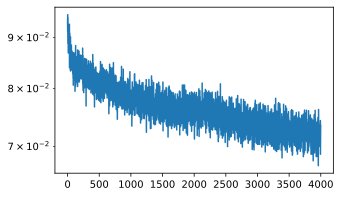

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(hist)
plt.yscale('log')
plt.close()
fig

In [117]:
vis.stop_all_display_threads()